### Dataset Description

The US Arrests dataset contains crime statistics for the 50 U.S. states in 1973. It includes the number of arrests (per 100,000 residents) for:
- **Murder**
- **Assault**
- **Rape**

It also includes:
- **UrbanPop**: The percentage of the population living in urban areas.
- **City** column (which actually represents state names).

The aim is to explore the data for patterns in crime across states.

In [8]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

# Load data with 'City' as the index
df = pd.read_csv("usarrest.csv", index_col="City")
df.head()

,Murder,Assault,UrbanPop,Rape
City,,,,
Alabama,13.2,236,58,21.2
Alaska,10.0,263,48,44.5
Arizona,8.1,294,80,31.0
Arkansas,8.8,190,50,19.5
California,9.0,276,91,40.6


In [9]:
df.info()
df.isnull().sum()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Index: 50 entries, Alabama to Wyoming
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Murder    50 non-null     float64
 1   Assault   50 non-null     int64  
 2   UrbanPop  50 non-null     int64  
 3   Rape      50 non-null     float64
dtypes: float64(2), int64(2)
memory usage: 2.0+ KB


,Murder,Assault,UrbanPop,Rape
count,50.00000,50.000000,50.000000,50.000000
mean,7.78800,170.760000,65.540000,21.232000
std,4.35551,83.337661,14.474763,9.366385
min,0.80000,45.000000,32.000000,7.300000
25%,4.07500,109.000000,54.500000,15.075000
50%,7.25000,159.000000,66.000000,20.100000
75%,11.25000,249.000000,77.750000,26.175000
max,17.40000,337.000000,91.000000,46.000000


### Data Cleaning

- No missing values detected in any column.
- Data types are already numeric and ready for analysis.
- Renamed the index to represent state names for clarity.

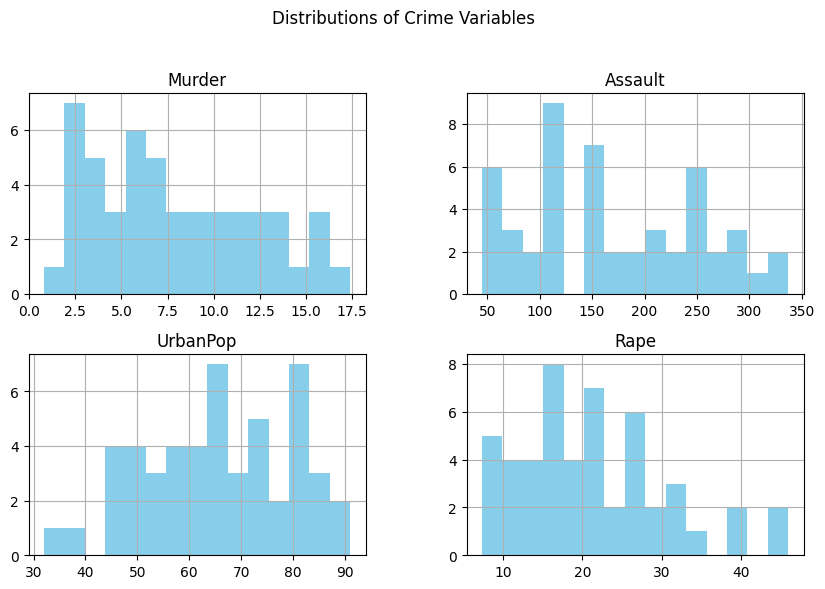

In [10]:
df.hist(figsize=(10, 6), bins=15, color='skyblue')
plt.suptitle("Distributions of Crime Variables", y=1.02)
plt.show()


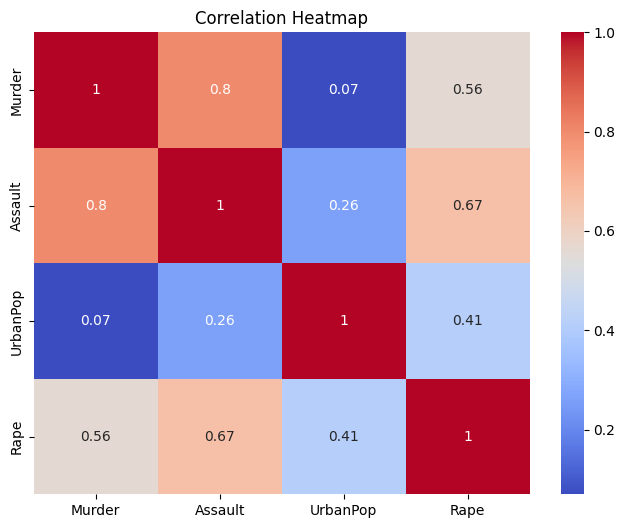

In [11]:
plt.figure(figsize=(8, 6))
sns.heatmap(df.corr(), annot=True, cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

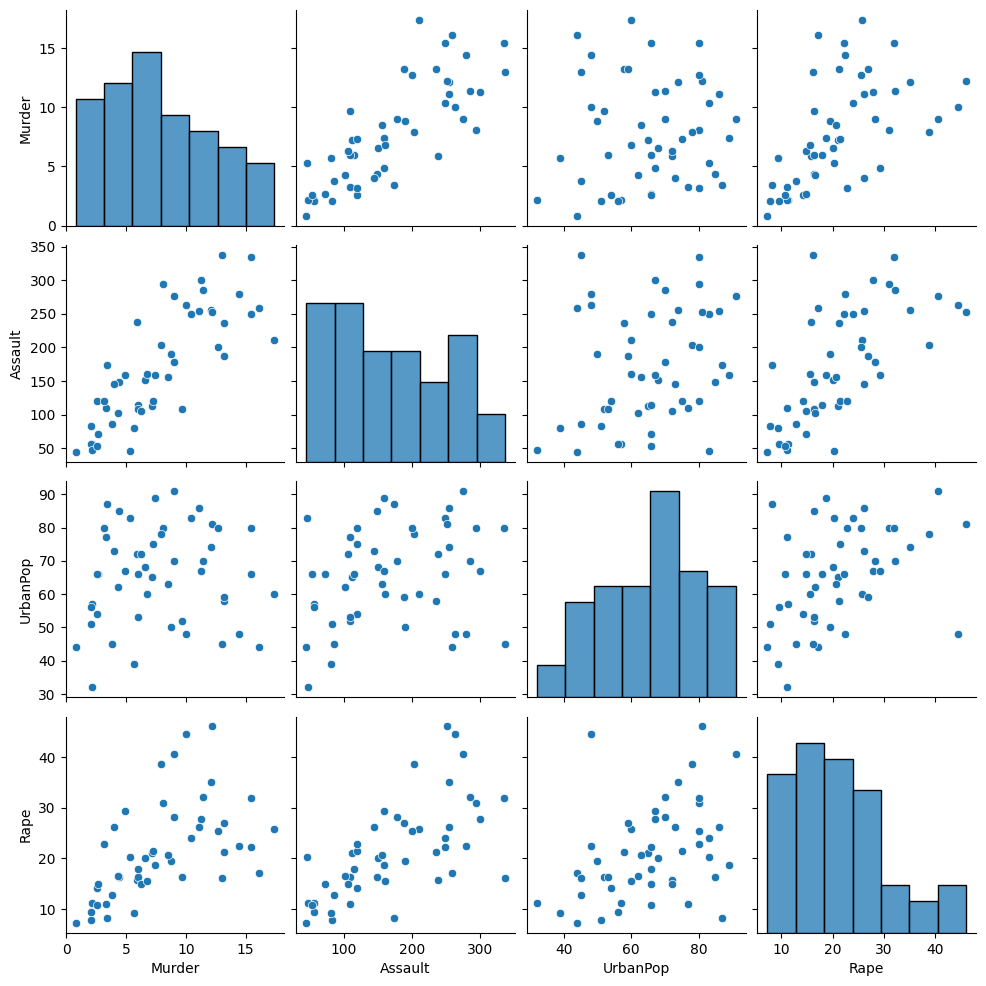

In [12]:
sns.pairplot(df)

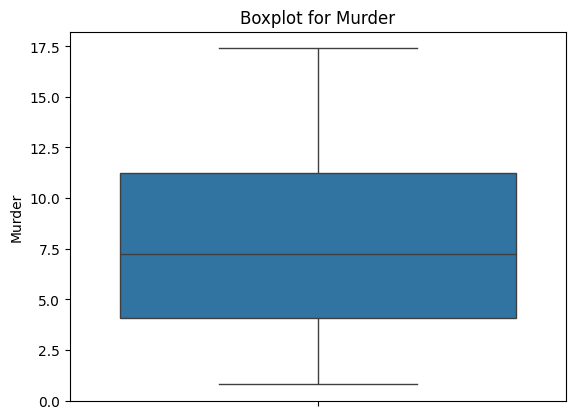

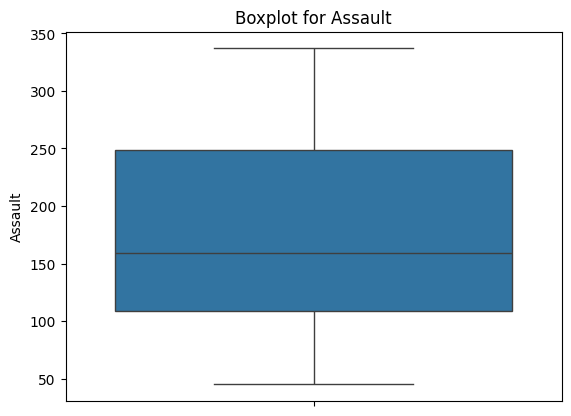

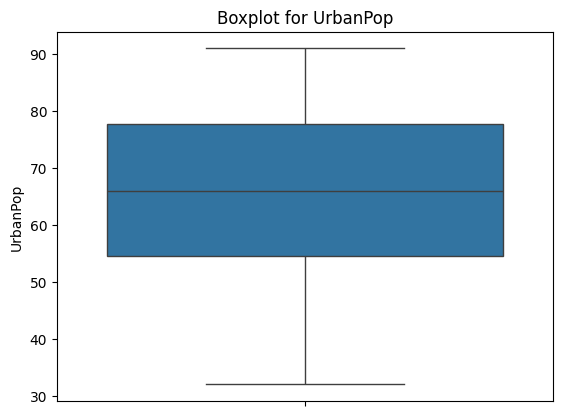

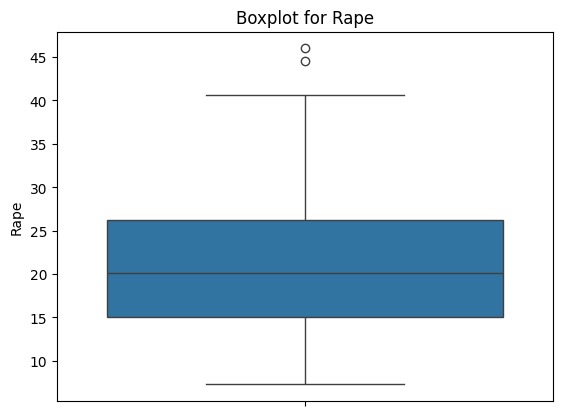

In [13]:
for col in df.columns:
    sns.boxplot(data=df, y=col)
    plt.title(f"Boxplot for {col}")
    plt.show()

In [14]:
print("Top 5 States by Murder Rate:\n", df['Murder'].sort_values(ascending=False).head())
print("\nTop 5 States by Assault Rate:\n", df['Assault'].sort_values(ascending=False).head())
print("\nTop 5 States by Rape Rate:\n", df['Rape'].sort_values(ascending=False).head())

Top 5 States by Murder Rate:
 City
Georgia           17.4
Mississippi       16.1
Louisiana         15.4
Florida           15.4
South Carolina    14.4
Name: Murder, dtype: float64

Top 5 States by Assault Rate:
 City
North Carolina    337
Florida           335
Maryland          300
Arizona           294
New Mexico        285
Name: Assault, dtype: int64

Top 5 States by Rape Rate:
 City
Nevada        46.0
Alaska        44.5
California    40.6
Colorado      38.7
Michigan      35.1
Name: Rape, dtype: float64


### Findings

- **Assault** and **Murder** are strongly correlated (states with higher murder rates tend to also have more assaults).
- **UrbanPop** does not have a strong correlation with crime — urbanisation alone doesn't explain violent crime rates.
- **Rape** has moderate correlation with Murder and Assault, suggesting partial co-occurrence in violent crime trends.
- **Georgia**, **Florida**, and **Mississippi** are consistently high in violent crime metrics.
- States with lower crime metrics tend to be in the Midwest or Northeast (e.g. Vermont, North Dakota).

### Additional Observation

Some outliers are visible in the `Rape` and `Assault` variables. These may reflect reporting differences or genuine spikes in certain states.